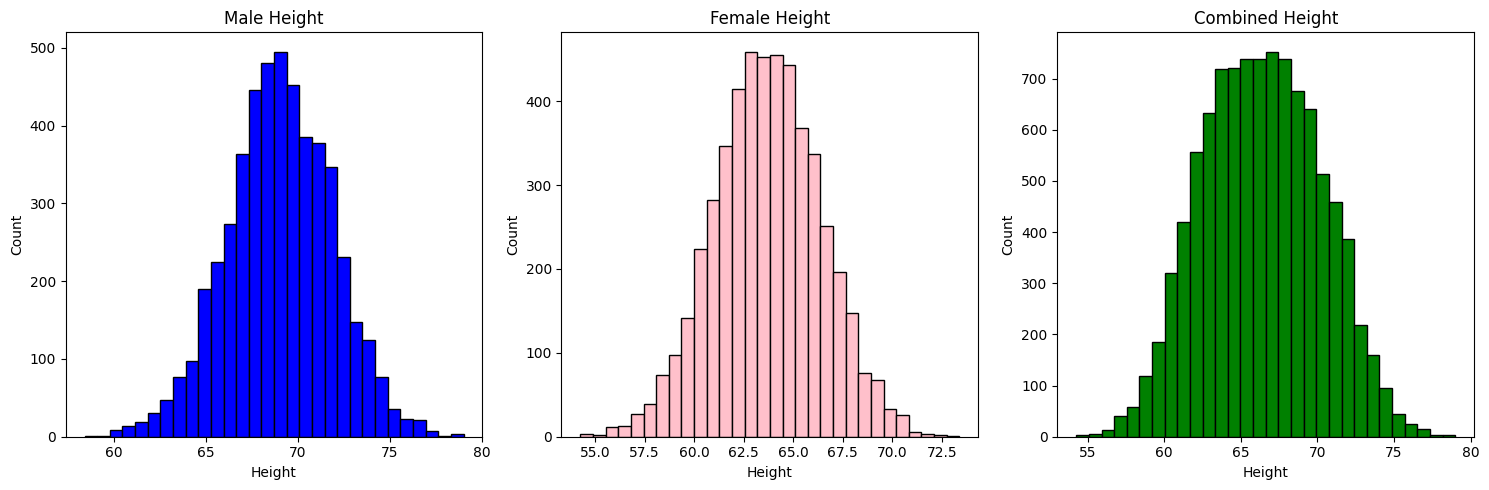

MEAN MALE 69.02634590621741 STD MALE 2.863362228660647
MEAN FEMALE 63.70877360342507 STD FEMALE 2.6962840157650536
MEAN COMBINED 66.36755975482124 STD COMBINED 3.847528120773229


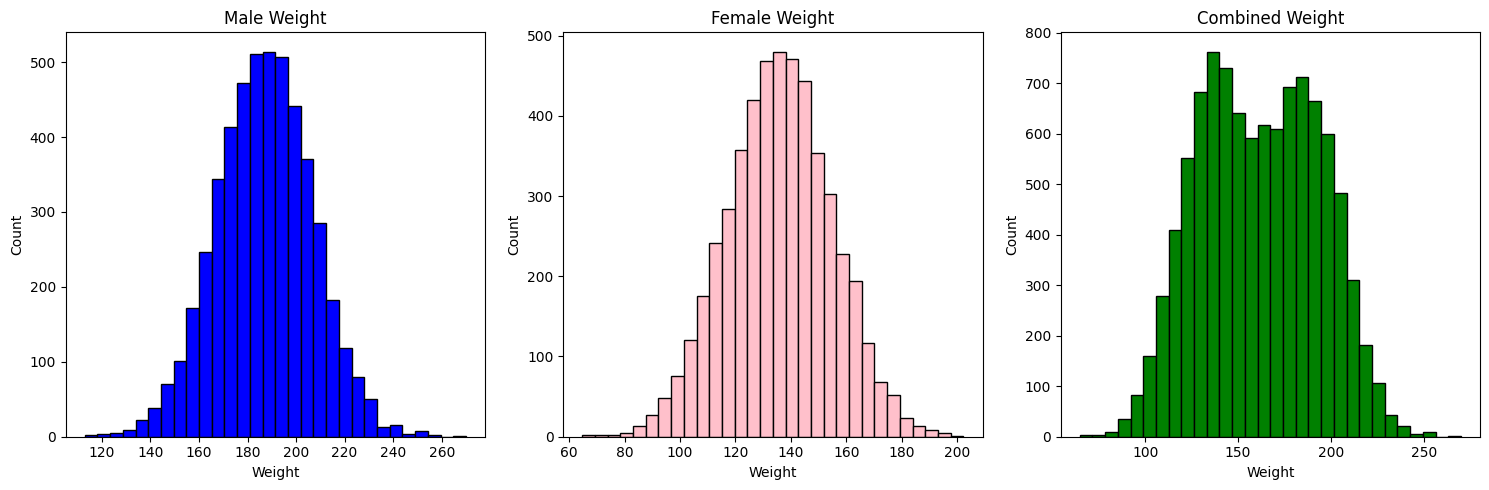

MEAN MALE 187.0206206581932 STD MALE 19.7811545167638
MEAN FEMALE 135.86009300746835 STD FEMALE 19.022467805319028
MEAN COMBINED 161.44035683283076 STD COMBINED 32.108439006519596


In [5]:
#give result on basis of chosen column height or weigth 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("weight-height.csv")


male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]
combined = data   

def show_histograms(column_name, label):
    plt.figure(figsize=(15, 5))

    
    plt.subplot(1, 3, 1)   
    plt.hist(male[column_name], bins=30, color="blue", edgecolor="black")
    plt.title('Male '+label)
    plt.xlabel(label)
    plt.ylabel("Count")


    plt.subplot(1, 3, 2)
    plt.hist(female[column_name], bins=30, color="pink", edgecolor="black")
    plt.title('Female '+label)
    plt.xlabel(label)
    plt.ylabel("Count")


    plt.subplot(1, 3, 3)
    plt.hist(combined[column_name], bins=30, color="green", edgecolor="black")
    plt.title('Combined '+label)
    plt.xlabel(label)
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

def stats(column_name):
        print ('MEAN MALE',male[column_name].mean(),'STD MALE', male[column_name].std())
        print ('MEAN FEMALE',female[column_name].mean(),'STD FEMALE', female[column_name].std())
        print ('MEAN COMBINED',combined[column_name].mean(),'STD COMBINED', combined[column_name].std())
    

show_histograms("Height","Height")
stats("Height")

show_histograms("Weight","Weight")
stats("Weight")

In [16]:
#writing up a code for taking random 40 sample from weight and height and doing z test on them 
import pandas as pd
import numpy as np
from scipy.stats import norm

data = pd.read_csv("weight-height.csv")

male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]
combined = data

def z_test(sample, population_mean, population_std, alpha):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))

    
    z_left = norm.ppf(alpha)         # left-tailed
    z_right = norm.ppf(1 - alpha)    # right-tailed
    z_two = norm.ppf(1 - alpha/2)    # two-tailed


    results = {
        "Sample Mean": sample_mean,
        "Z-score": z_score,
        "Left-tailed": "Reject H0" if z_score < z_left else "Fail to Reject H0",
        "Right-tailed": "Reject H0" if z_score > z_right else "Fail to Reject H0",
        "Two-tailed": "Reject H0" if abs(z_score) > z_two else "Fail to Reject H0"
    }
    return results

def run_tests(column_name, label, alpha):
    print(f" {label} Tests ")

    for group_name, group_data in [("Male", male), ("Female", female), ("Combined", combined)]:
        population_mean = group_data[column_name].mean()
        population_std = group_data[column_name].std()

    
        sample = group_data[column_name].sample(40)

        results = z_test(sample, population_mean, population_std, alpha)
        
        print("\n",group_name, label)
        print("Sample Mean =", round(results['Sample Mean'], 2))
        print("Z-score =", round(results['Z-score'], 2))
        print("Left-tailed test:", results['Left-tailed'])
        print("Right-tailed test:", results['Right-tailed'])
        print("Two-tailed test:", results['Two-tailed'])



alpha = float(input("Enter the significance level α (e.g., 0.05): "))

run_tests("Weight", "Weight", alpha)
run_tests("Height", "Height", alpha)


Enter the significance level α (e.g., 0.05):  1


 Weight Tests 

 Male Weight
Sample Mean = 191.78
Z-score = 1.52
Left-tailed test: Reject H0
Right-tailed test: Reject H0
Two-tailed test: Reject H0

 Female Weight
Sample Mean = 132.05
Z-score = -1.27
Left-tailed test: Reject H0
Right-tailed test: Reject H0
Two-tailed test: Reject H0

 Combined Weight
Sample Mean = 157.75
Z-score = -0.73
Left-tailed test: Reject H0
Right-tailed test: Reject H0
Two-tailed test: Reject H0
 Height Tests 

 Male Height
Sample Mean = 68.91
Z-score = -0.26
Left-tailed test: Reject H0
Right-tailed test: Reject H0
Two-tailed test: Reject H0

 Female Height
Sample Mean = 63.61
Z-score = -0.23
Left-tailed test: Reject H0
Right-tailed test: Reject H0
Two-tailed test: Reject H0

 Combined Height
Sample Mean = 65.87
Z-score = -0.82
Left-tailed test: Reject H0
Right-tailed test: Reject H0
Two-tailed test: Reject H0


In [ ]:
#code for taking n random samples and performing t test on them 
import pandas as pd
import numpy as np
from scipy.stats import t

# Load data
data = pd.read_csv("weight-height.csv")

male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]
combined = data

def t_test(sample, population_mean, alpha):
    n = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation
    t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

    # Critical t-values
    t_left = t.ppf(alpha, df=n-1)          # left-tailed
    t_right = t.ppf(1 - alpha, df=n-1)     # right-tailed
    t_two = t.ppf(1 - alpha/2, df=n-1)     # two-tailed

    results = {
        "Sample Mean": sample_mean,
        "Sample Std": sample_std,
        "T-score": t_score,
        "Left-tailed": "Reject H0" if t_score < t_left else "Fail to Reject H0",
        "Right-tailed": "Reject H0" if t_score > t_right else "Fail to Reject H0",
        "Two-tailed": "Reject H0" if abs(t_score) > t_two else "Fail to Reject H0"
    }
    return results

def run_t_tests(column_name, label, alpha, n_samples):
    print(f"\n{label} T-Tests with sample size = {n_samples}")
    
    for group_name, group_data in [("Male", male), ("Female", female), ("Combined", combined)]:
        population_mean = group_data[column_name].mean()

        # Random sample of size n_samples
        sample = group_data[column_name].sample(n_samples)

        results = t_test(sample, population_mean, alpha)
        print("\n", group_name, label)
        print("Sample Mean =", round(results['Sample Mean'], 2))
        print("Sample Std =", round(results['Sample Std'], 2))
        print("T-score =", round(results['T-score'], 2))
        print("Left-tailed test:", results['Left-tailed'])
        print("Right-tailed test:", results['Right-tailed'])
        print("Two-tailed test:", results['Two-tailed'])

alpha = float(input("Enter the significance level α (e.g., 0.05): "))
n_samples = int(input("Enter the sample size n for t-test: "))

run_t_tests("Weight", "Weight", alpha, n_samples)
run_t_tests("Height", "Height", alpha, n_samples)


In [ ]:
#change in sample size n change the value of t in t test as n increases t increases